In [2]:
rm(list=ls())
gc() 

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,575468,30.8,1167155,62.4,1167155,62.4
Vcells,1068208,8.2,8388608,64.0,1754811,13.4


In [3]:
ls()

character(0)

In [4]:
library(monocle)

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, wh

In [6]:
setwd("scRNAseq_WBC_revision/merge/Fig3")

In [42]:
load("lym.monocle.input.Rdata")

In [43]:
ls()

[1] "lym.monocle.cell.annotation" "lym.monocle.exp.M"          
[3] "lym.monocle.gene.annotation"

In [44]:
dim(lym.monocle.gene.annotation)

[1] 25279     1

In [45]:
gene.index=rowSums(lym.monocle.exp.M)>0

In [46]:
lym.monocle.exp.M=lym.monocle.exp.M[gene.index,]
lym.monocle.gene.annotation=data.frame(gene_short_name=as.character(as.matrix(lym.monocle.gene.annotation[gene.index,1])))
lym.monocle.gene.annotation$gene_short_name=as.character(as.matrix(lym.monocle.gene.annotation$gene_short_name))
rownames(lym.monocle.gene.annotation)=lym.monocle.gene.annotation$gene_short_name

In [47]:
str(lym.monocle.gene.annotation)

'data.frame':	21852 obs. of  1 variable:
 $ gene_short_name: chr  "AL627309.1" "AL669831.5" "FAM87B" "LINC00115" ...


In [48]:
dim(lym.monocle.exp.M)

[1] 21852  8277

In [49]:
pd <- new('AnnotatedDataFrame', data = lym.monocle.cell.annotation)
fd <- new('AnnotatedDataFrame', data = lym.monocle.gene.annotation)

In [50]:
rownames(pd)=colnames(lym.monocle.exp.M)

In [51]:
monocle_cds <- newCellDataSet(lym.monocle.exp.M,
                         phenoData = pd,
                         featureData = fd,
                         expressionFamily = negbinomial.size())

In [52]:
lym<-monocle_cds
lym <- estimateSizeFactors(lym)
lym <- estimateDispersions(lym)

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Removing 549 outliers

Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warning message:
“step size truncated due to divergence”
Warning message in log(ifelse(y == 0, 1, y/mu)):
“NaNs produced”
Warni

In [53]:
lym <- detectGenes(lym, min_expr = 3 )

In [54]:
dim(lym)

Features  Samples 
   21852     8277

In [55]:
expressed_genes <- row.names(subset(fData(lym),num_cells_expressed >= 5))

'data.frame':	19750 obs. of  4 variables:
 $ gene_id             : Factor w/ 19750 levels "A1BG","A1BG-AS1",..: 3516 3534 7924 10532 7884 12646 10224 13725 3522 9110 ...
 $ mean_expression     : num  0.00053 0.00865 0.00103 0.01054 0.00888 ...
 $ dispersion_fit      : num  354.6 21.7 181.6 17.8 21.2 ...
 $ dispersion_empirical: num  0 89.2 0 36.2 42.3 ...


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


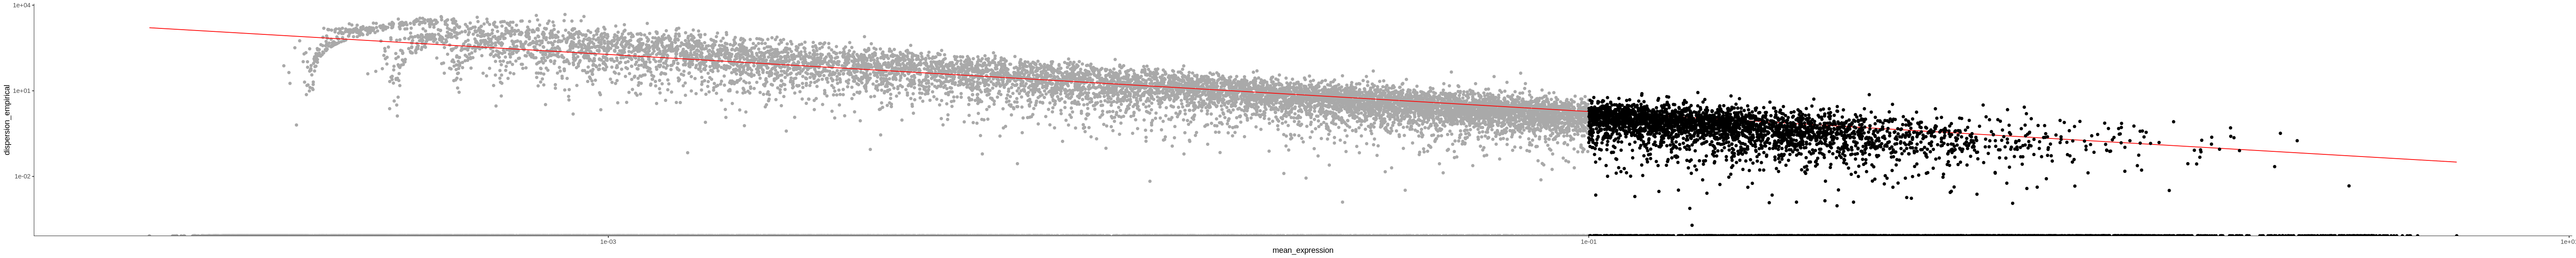

In [56]:
disp_table <- dispersionTable(lym)
str(disp_table)
unsup_clustering_genes <- subset(disp_table, mean_expression >= 0.1)
lym <- setOrderingFilter(lym, unsup_clustering_genes$gene_id)
plot_ordering_genes(lym)

In [57]:
lym <- reduceDimension(lym, max_components = 2, num_dim = 15,reduction_method = 'tSNE', verbose = T)

Remove noise by PCA ...

Reduce dimension by tSNE ...



In [58]:
lym <- clusterCells(lym)

Distance cutoff calculated to 4.527022 


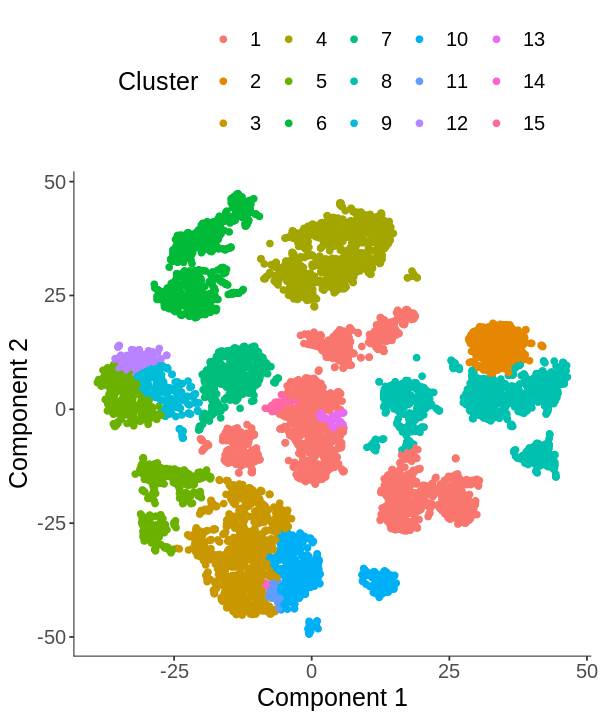

In [59]:
options(repr.plot.width=5,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2)

In [60]:
str(lym.monocle.cell.annotation)

'data.frame':	8277 obs. of  23 variables:
 $ batch                  : chr  "0" "0" "0" "0" ...
 $ nCount_RNA             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nFeatures_RNA          : int  2386 2341 2425 2240 1748 2019 2057 2497 2298 2480 ...
 $ percent.mito           : num  0.02054 0.01971 0.02245 0.02254 0.00275 ...
 $ louvain                : chr  "1" "1" "1" "1" ...
 $ new.louvain            : int  8 8 8 8 8 6 4 8 6 4 ...
 $ dataset                : chr  "1" "1" "1" "1" ...
 $ cellAnno               : chr  "1" "1" "1" "1" ...
 $ orig.ident             : chr  NA NA NA NA ...
 $ nFeature_RNA           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_genes                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ n_genes_by_counts      : int  NA NA NA NA NA NA NA NA NA NA ...
 $ log1p_n_genes_by_counts: num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_counts           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ log1p_total_counts     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_counts_mt        :

In [61]:
table(lym$cellAnno)
lym$cellAnno=as.character(lym$cellAnno)


   0    1   10   11    2    3    4    6    7    9 
1346 2263  154  119  990 1392  563  543  433  474 

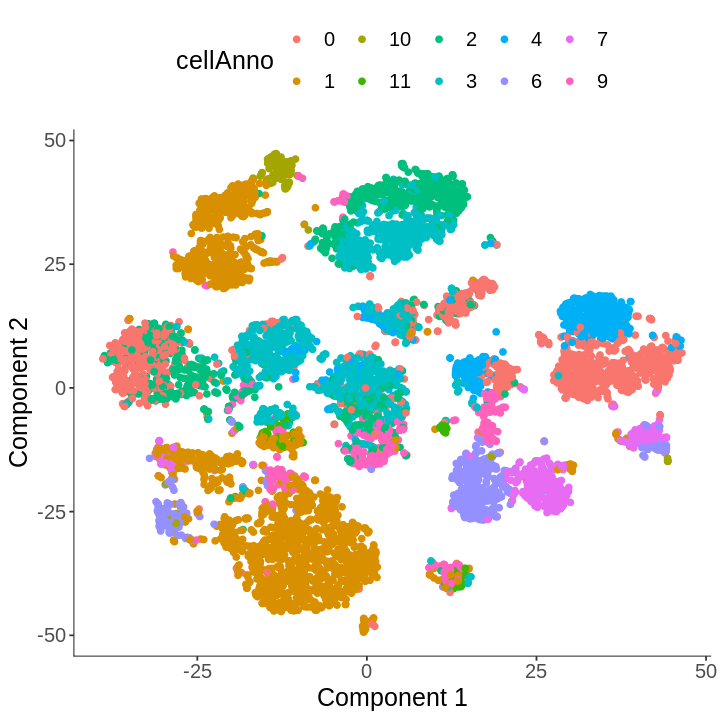

In [62]:
options(repr.plot.width=6,repr.plot.height=6)
plot_cell_clusters(lym, 1, 2, color = "cellAnno")

In [131]:
load("all.DEGs.Rdata")
ordering_genes=sample(rownames(all.DEGs),size = 900,replace = F)
#ordering_genes=rownames(all.DEGs)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


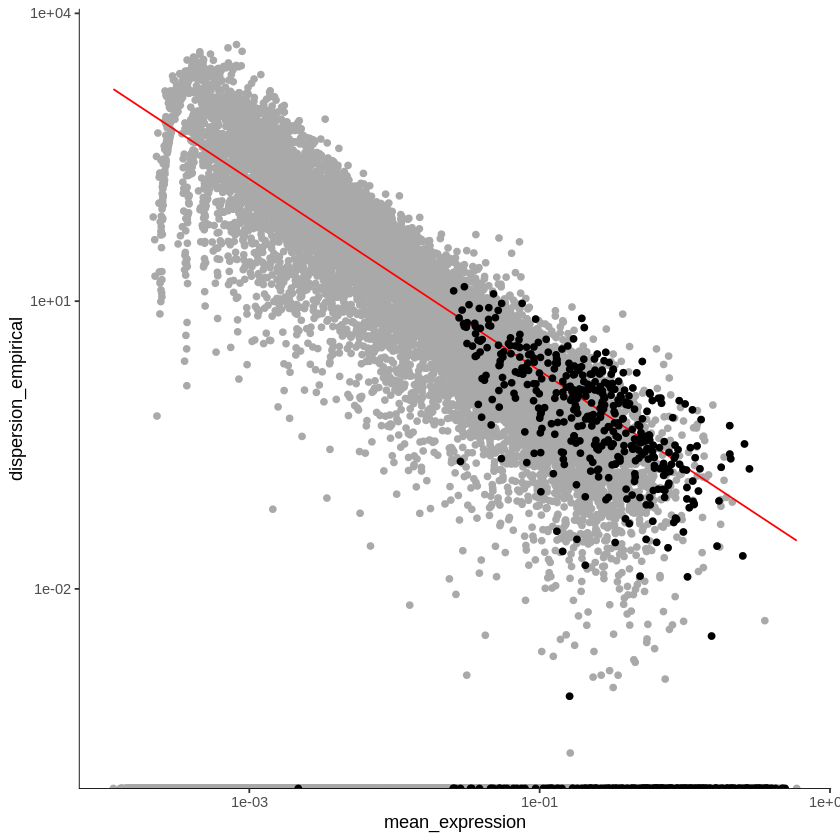

In [132]:
lym <- setOrderingFilter(lym, ordering_genes)
plot_ordering_genes(lym)

In [133]:
lym <- reduceDimension(lym, max_components = 2,method = 'DDRTree')

In [134]:
lym <- orderCells(lym)

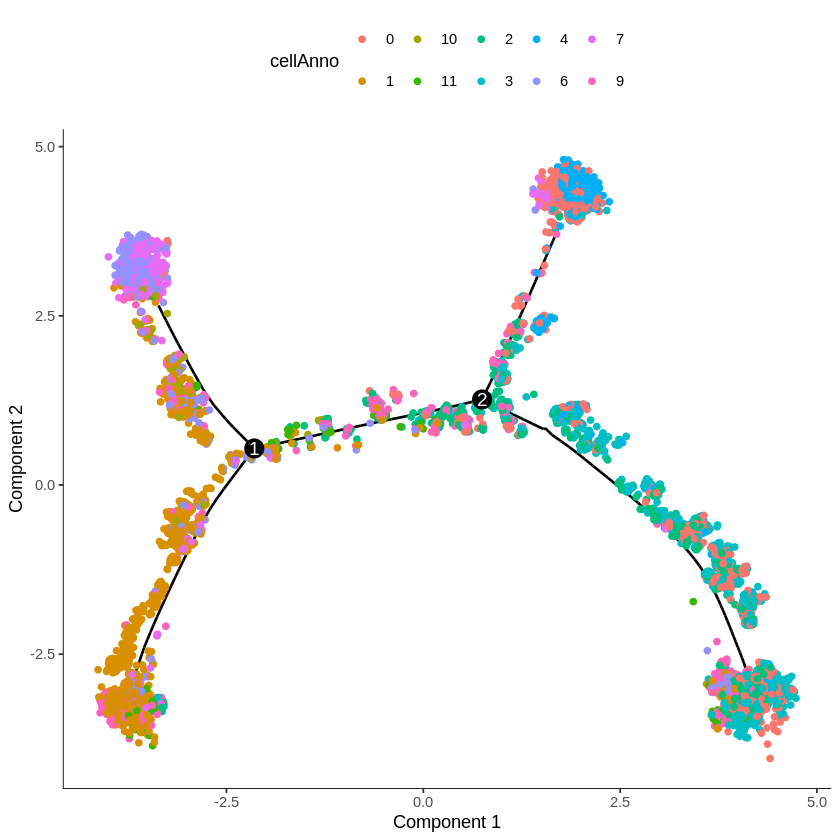

In [135]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "cellAnno")

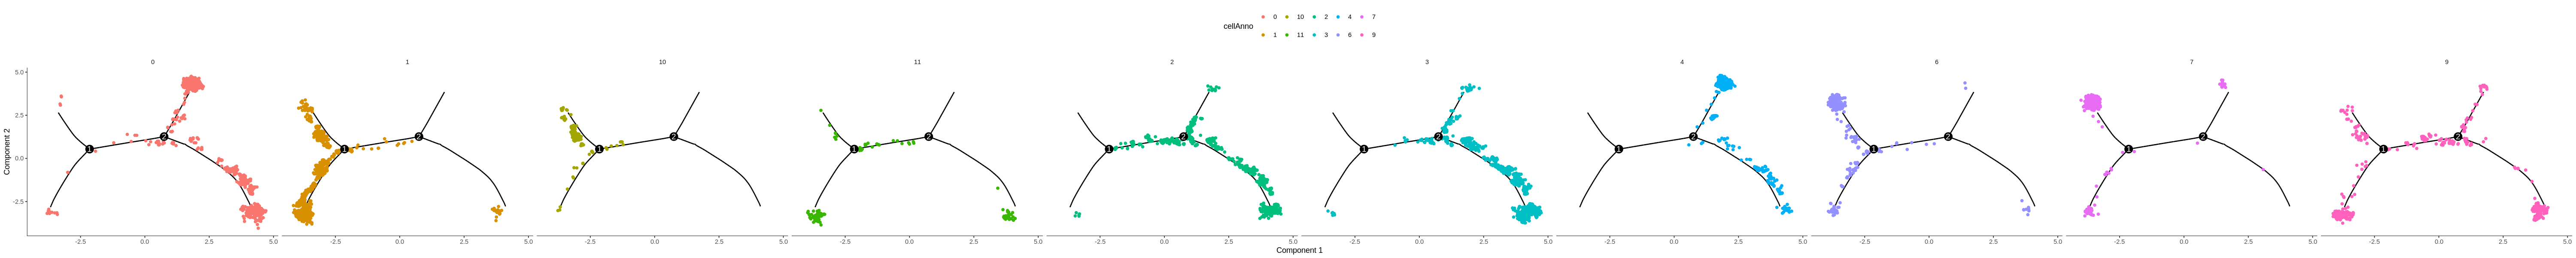

In [136]:
options(repr.plot.width=50,repr.plot.height=5)
plot_cell_trajectory(lym, color_by = "cellAnno") +facet_wrap(~cellAnno, nrow = 1)

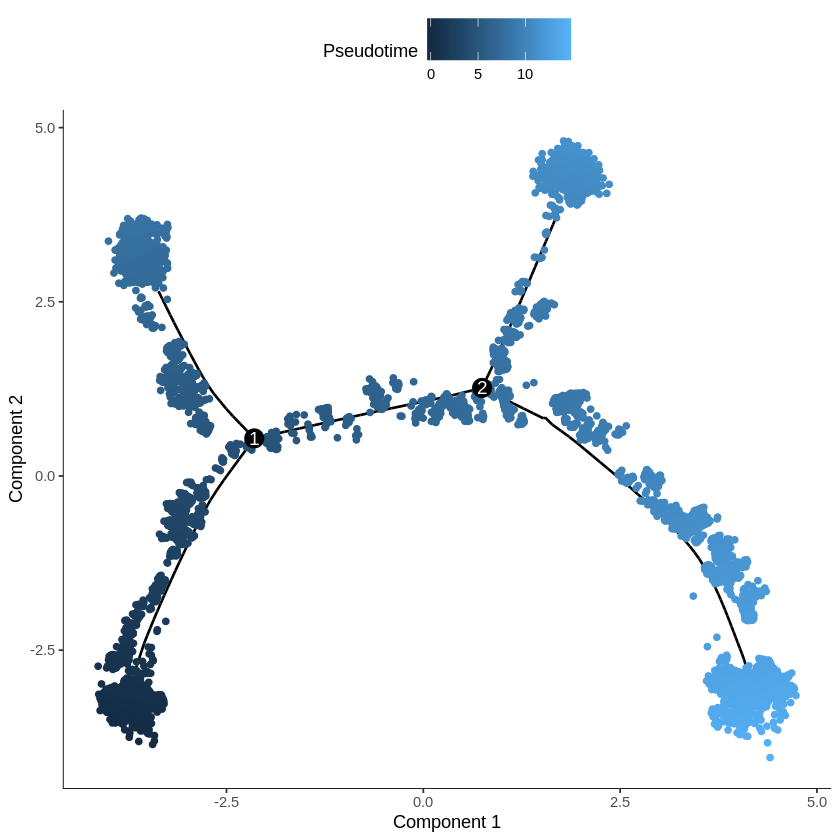

In [137]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [123]:
save(ordering_genes,lym,file="total.integrate.lym.monocle.object3.Rdata")

In [138]:
##############################################################################################################

In [49]:
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2477415,132.4,4312831,230.4,4312831,230.4
Vcells,188256272,1436.3,446475117,3406.4,375942287,2868.3


In [50]:
load("total.integrate.lym.monocle.object.Rdata")

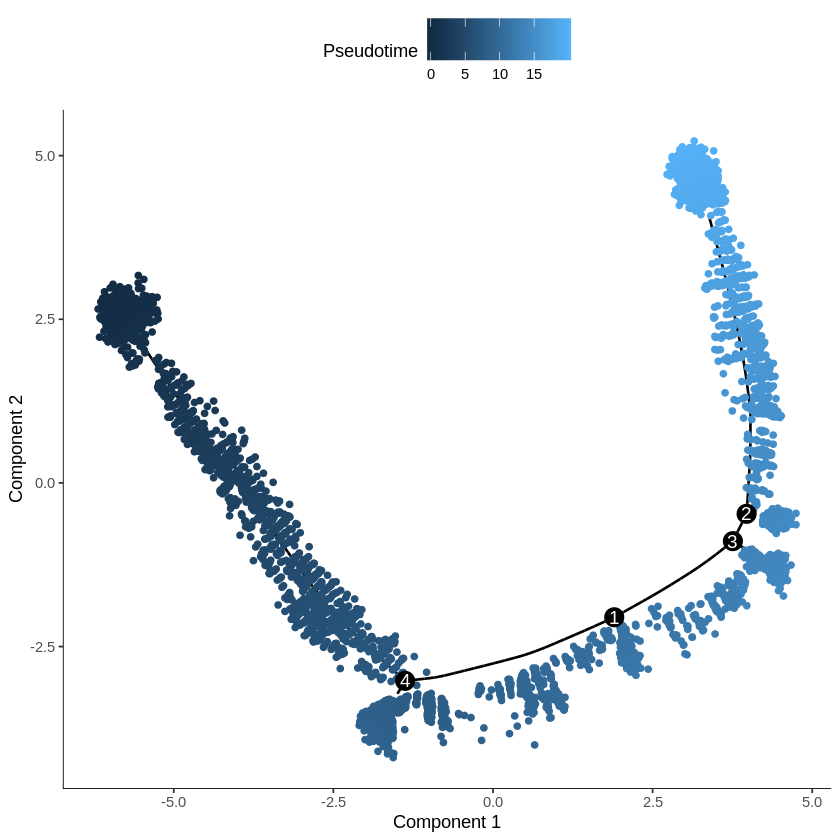

In [52]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

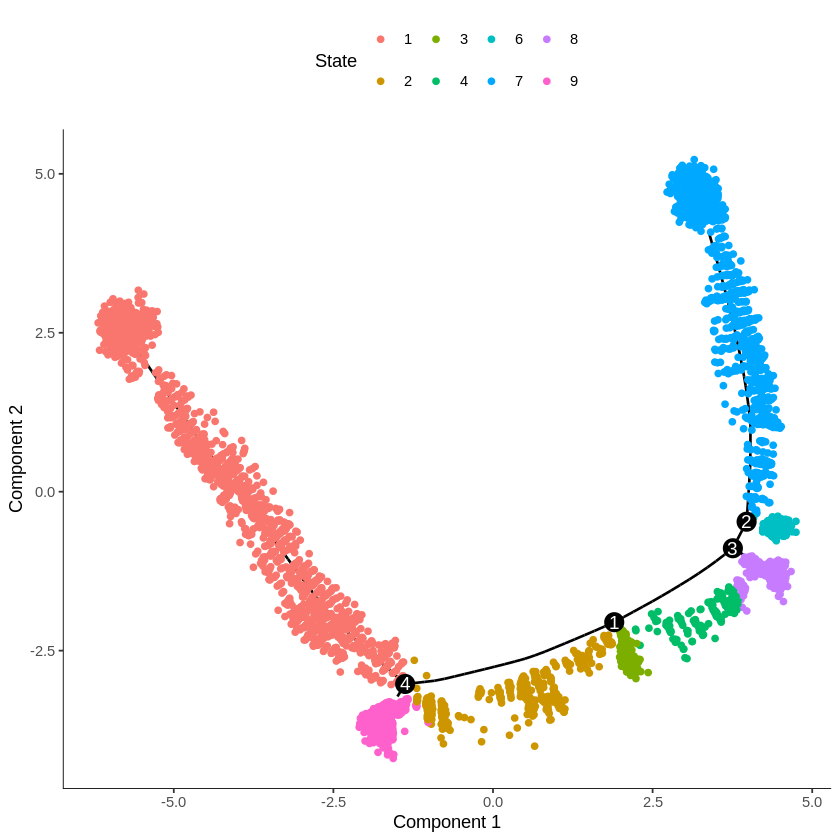

In [145]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "State")

In [53]:
lym <- orderCells(lym,root_state = "8")

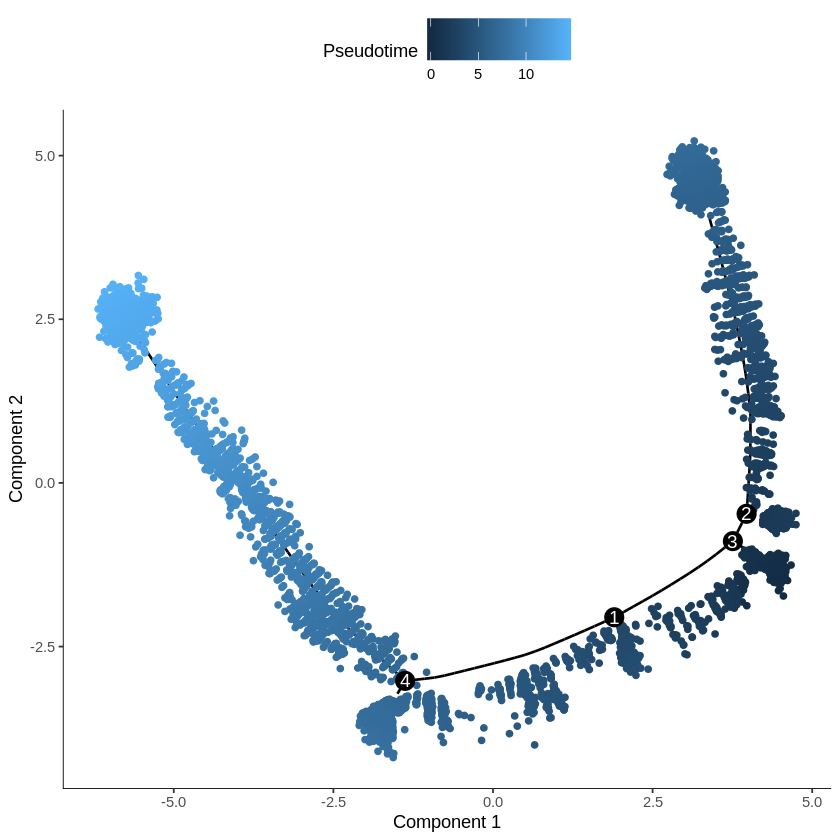

In [54]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [57]:
save(ordering_genes,lym,file="total.integrate.lym.monocle.object.Rdata")

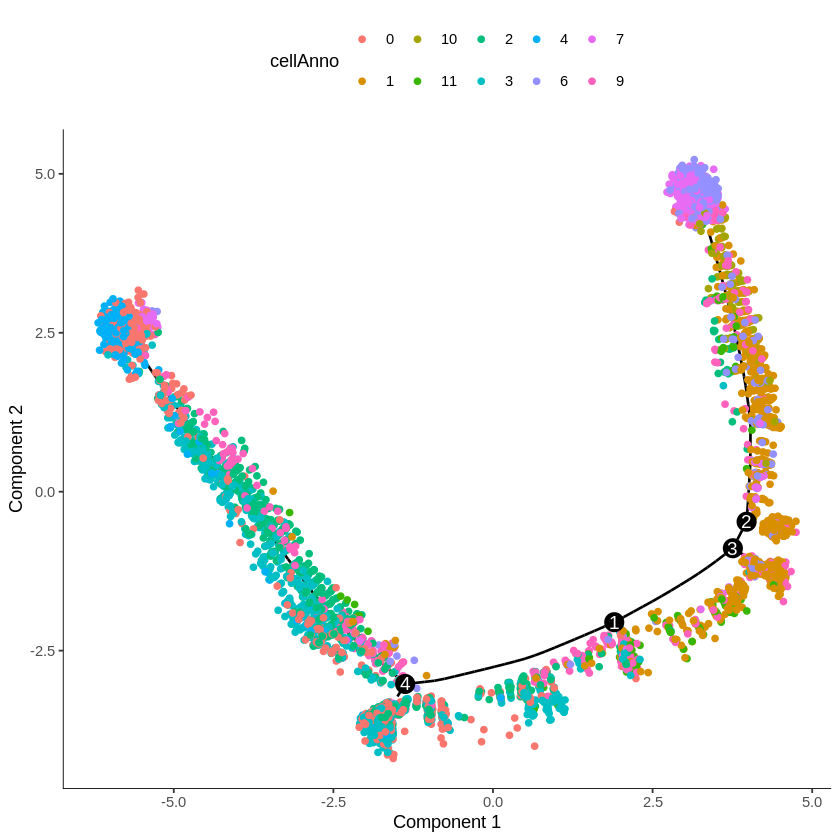

In [58]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "cellAnno")

In [153]:
p=plot_cell_trajectory(lym, color_by = "Pseudotime")
pdf("Fig3G.monocle.Pseudotime.pdf",width = 7,height = 7)
print(p)
dev.off()

png 
  2

In [150]:
p=plot_cell_trajectory(lym, color_by = "cellAnno")
pdf("Fig3H.monocle.cluter.pdf",width = 7,height = 7)
print(p)
dev.off()

png 
  2

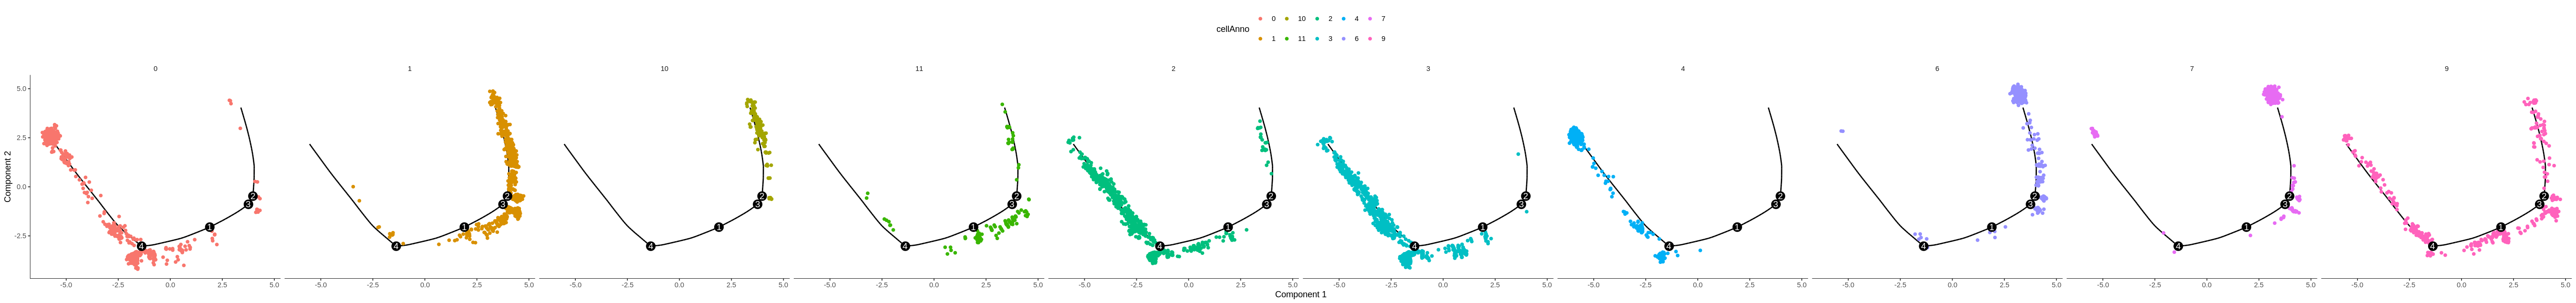

In [155]:
options(repr.plot.width=45,repr.plot.height=5.3)
plot_cell_trajectory(lym, color_by = "cellAnno") +facet_wrap(~cellAnno, nrow = 1)

In [156]:
p=plot_cell_trajectory(lym, color_by = "cellAnno") +facet_wrap(~cellAnno, nrow = 1)
pdf("FigS3C.monocle.split.cluter.pdf",width = 45,height = 5.3)
print(p)
dev.off()

png 
  2

In [9]:
str(lym)

Formal class 'CellDataSet' [package "monocle"] with 19 slots
  ..@ reducedDimS          : num [1:2, 1:8277] 4.41 1.16 4.23 1.45 4.29 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:8277] "AAACCTGAGAGGTTGC-1-WBC10-WBC10" "AAACCTGTCACAACGT-1-WBC10-WBC10" "AAAGCAAGTAAACGCG-1-WBC10-WBC10" "AAAGCAATCAGTTTGG-1-WBC10-WBC10" ...
  ..@ reducedDimW          : num [1:718, 1:2] -0.00116 -0.01144 0.04427 0.01893 0.01913 ...
  ..@ reducedDimA          : num [1:2, 1:8277] -25.4 27.7 -23.8 23.7 -20.1 ...
  ..@ reducedDimK          : num [1:2, 1:132] 4.033 0.911 4.016 1.216 3.999 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:132] "Y_1" "Y_2" "Y_3" "Y_4" ...
  ..@ minSpanningTree      :List of 10
  .. ..$ :List of 1
  .. .. ..$ Y_1: 'igraph.vs' Named int [1:2] 24 69
  .. .. .. ..- attr(*, "names")= chr [1:2] "Y_24" "Y_69"
  .. .. .. ..- attr(*, "env")=<weakref> 
  .. .. .. ..- attr(*, "graph")= chr "ddb2238f-d9e0-45c9-82e1-d8152cd28

In [59]:
umap=t(lym@reducedDimS)

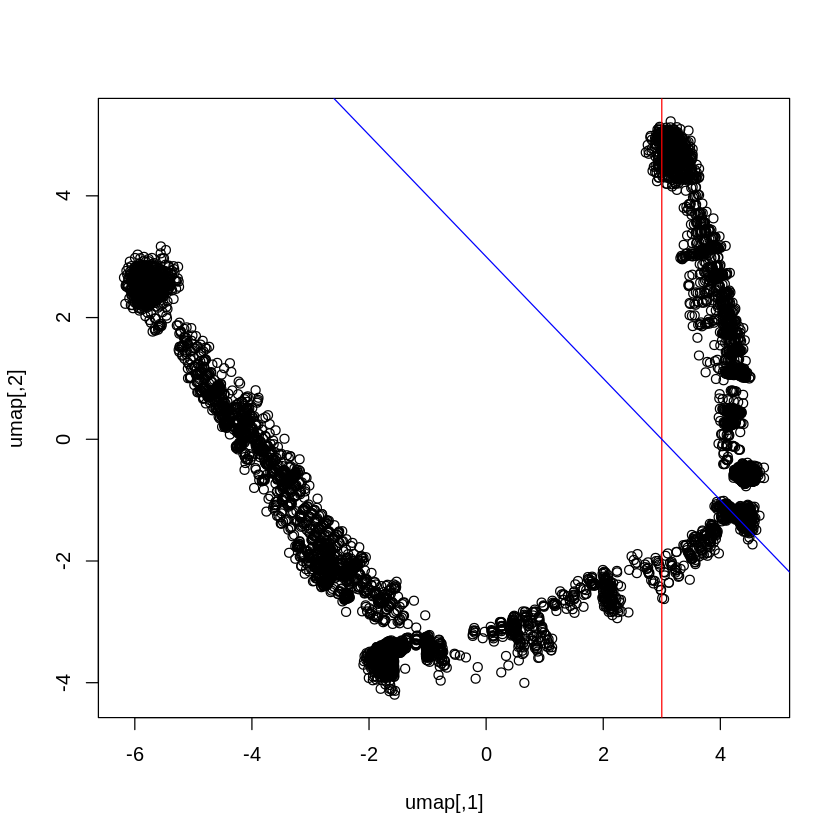

In [60]:
options(repr.plot.width=7,repr.plot.height=7)
plot(umap)
abline(v = 3, col = "red")
abline(a = 3 ,b = (-1), col  = "blue")

In [61]:
index=which(umap[,1]*(-1)+3.5>umap[,2])

In [62]:
circols=rep("red",times = nrow(umap))
circols[index]="blue"

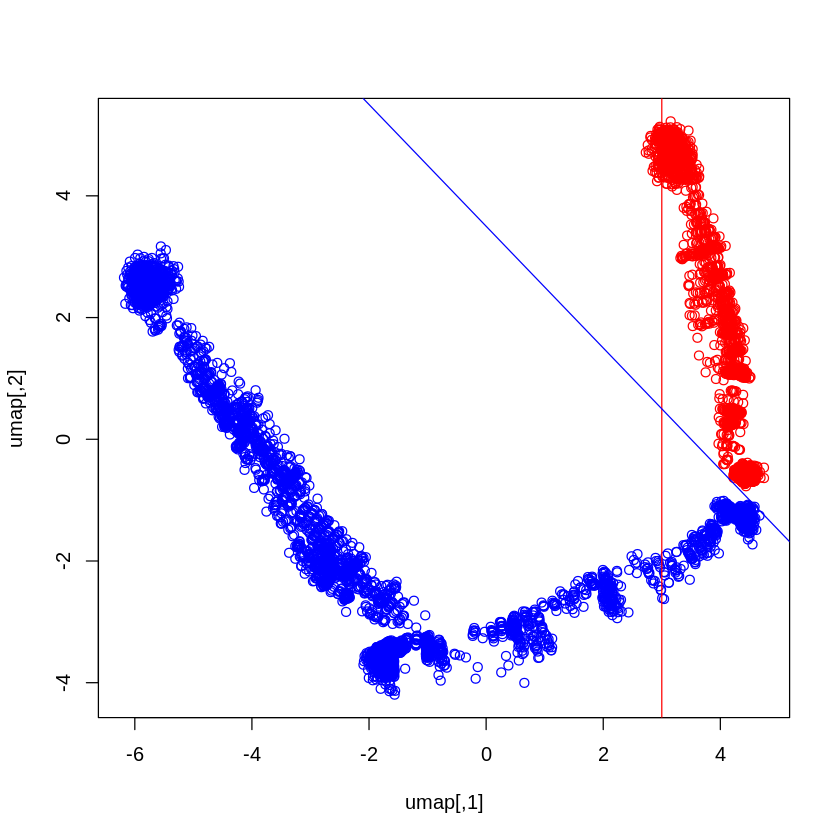

In [63]:
options(repr.plot.width=7,repr.plot.height=7)
plot(umap,col=circols)
abline(v = 3, col = "red")
abline(a = 3.5 ,b = (-1), col  = "blue")

In [71]:
pseudo=lym$Pseudotime

In [72]:
str(pseudo)

 num [1:8277] 5.56 5.86 5.72 5.56 6.02 ...


In [73]:
range(pseudo)

[1]  0.00000 14.35188

In [67]:
change.index=grep("red",circols)

In [74]:
pseudo[change.index]=pseudo[change.index]+0.5

In [75]:
lym$Pseudotime=pseudo

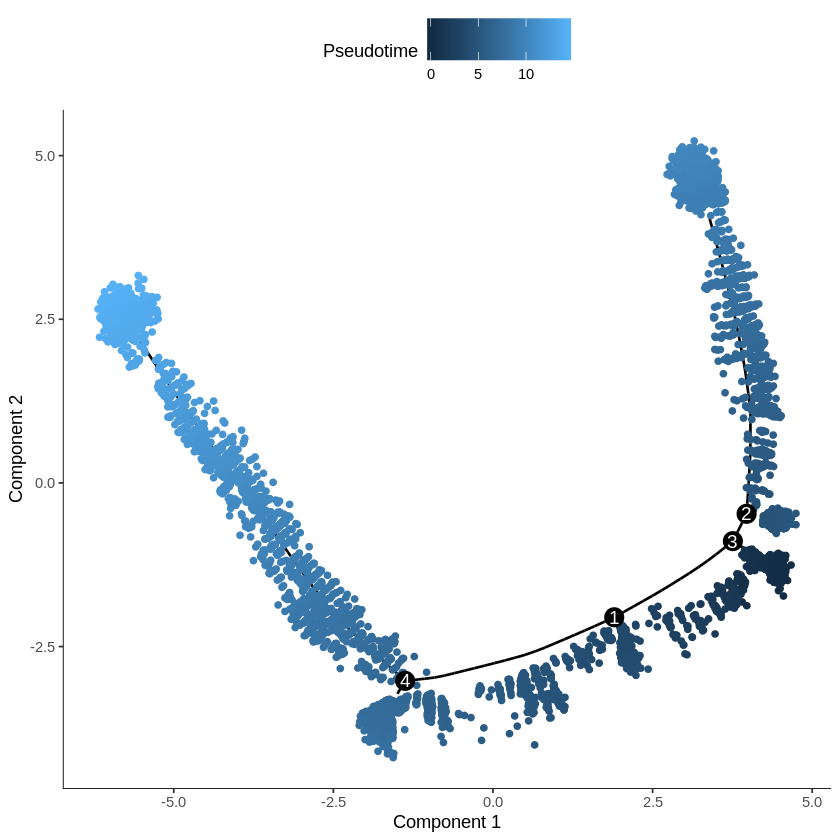

In [76]:
options(repr.plot.width=7,repr.plot.height=7)
plot_cell_trajectory(lym, color_by = "Pseudotime")

In [77]:
p=plot_cell_trajectory(lym, color_by = "Pseudotime")
pdf("Fig3G.monocle.Pseudotime.pdf",width = 7,height = 7)
print(p)
dev.off()

png 
  2

In [81]:
pseudotime=lym$Pseudotime

In [82]:
save(pseudotime,file="lym.monocle.time.Rdata")

In [83]:
monocleRes=phenoData(lym)@data
head(monocleRes,3)

,batch,nCount_RNA,nFeatures_RNA,percent.mito,louvain,new.louvain,dataset,cellAnno,orig.ident,nFeature_RNA,⋯,Size_Factor,num_genes_expressed,Cluster,peaks,halo,delta,rho,nearest_higher_density_neighbor,Pseudotime,State
,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<fct>
AAACCTGAGAGGTTGC-1-WBC10-WBC10,0,0,2386,0.02054103,1,8,1,1,NA,0,⋯,1.258734,102,6,FALSE,FALSE,0.4865075,137.1052,NA,6.060776,7
AAACCTGTCACAACGT-1-WBC10-WBC10,0,0,2341,0.01971245,1,8,1,1,NA,0,⋯,1.261311,103,6,FALSE,FALSE,0.3685506,176.7318,NA,6.359956,7
AAAGCAAGTAAACGCG-1-WBC10-WBC10,0,0,2425,0.02244750,1,8,1,1,NA,0,⋯,1.297815,117,6,FALSE,FALSE,0.1002054,123.5063,NA,6.217662,7


In [84]:
table(monocleRes$new.batch)


   10w    12w    14w 15_17w 
   643   3799   1714   2121 

In [85]:
dim(monocleRes)

[1] 8277   33

In [86]:
monocleRes.order=monocleRes[order(monocleRes$Pseudotime,decreasing = F),]

In [87]:
head(monocleRes.order)

,batch,nCount_RNA,nFeatures_RNA,percent.mito,louvain,new.louvain,dataset,cellAnno,orig.ident,nFeature_RNA,⋯,Size_Factor,num_genes_expressed,Cluster,peaks,halo,delta,rho,nearest_higher_density_neighbor,Pseudotime,State
,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<dbl>,<fct>
CTAGGTAAGCTGCCAC-1-WBC10_2,WBC10_2,3841.394,NA,NA,15,NA,NA,9,SeuratProject,5282,⋯,1.4627256,80,10,FALSE,TRUE,0.34509894,87.28486,NA,0.00000000,8
TCCTCGATCTTGGCTC-1-WBC10_2,WBC10_2,3590.710,NA,NA,2,NA,NA,9,SeuratProject,4996,⋯,1.3673864,95,10,FALSE,TRUE,0.25264100,102.35639,NA,0.07028244,8
CCCTCTCTCAGGAACG-1-WBC10_2,WBC10_2,2617.396,NA,NA,2,NA,NA,1,SeuratProject,1496,⋯,0.9001388,68,10,FALSE,TRUE,0.08880618,84.18648,NA,0.10455143,8
ACACCAACAGCTATTG-1-WBC14,WBC14,3792.641,NA,NA,2,NA,NA,1,SeuratProject,4287,⋯,2.1292406,75,5,FALSE,TRUE,0.24270913,77.69634,NA,0.10907601,8
GTTGTGAGTTCTAACG-1-WBC10_2,WBC10_2,3311.715,NA,NA,2,NA,NA,1,SeuratProject,3728,⋯,1.8380697,91,3,FALSE,TRUE,1.55032269,80.55560,NA,0.11423277,8
CGGACACCAAGTGGTG-1-WBC10_2,WBC10_2,3357.795,NA,NA,15,NA,NA,1,SeuratProject,4518,⋯,1.1878740,97,10,FALSE,TRUE,0.65267408,105.94592,NA,0.12975449,8


In [95]:
plotM=matrix(0,nc=nrow(monocleRes),nr=12)

In [96]:
for(i in 1:nrow(plotM)){
    index=grep(paste("^",names(table(monocleRes$cellAnno))[i],"$",sep=""),monocleRes.order$cellAnno,fixed = F)
    plotM[i,index]=i
}

In [97]:
table(plotM)

plotM
    0     1     2     3     4     5     6     7     8     9    10 
91047  1346  2263   154   119   990  1392   563   543   433   474 

In [98]:
library(RColorBrewer)

In [99]:
cols=c("#FFFFFF",sample(brewer.pal(12,"Paired"),12,replace = F))

In [100]:
library(pheatmap)

In [101]:
bk=seq(-0.5,12.5,by=1)
bk
length(bk)

[1] -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5

[1] 14

In [102]:
rownames(plotM)=names(table(monocleRes$cellAnno))

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [1] not equal to array extent


In [ ]:
#############################################################################################